In [1]:
import pandas as pd
df=pd.read_csv('d:/data/iris/iris2.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Result
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [2]:
df.columns #필드명

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'Result'],
      dtype='object')

In [3]:
df.shape #데이터의 차원

(150, 6)

In [4]:
df.describe() #기초통계량

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Result
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
df['target'].unique() #품종 이름 대표값

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
df.groupby('target').mean() #품종 기준 각 변수의 평균값

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Result
target,,,,,
setosa,5.006,3.428,1.462,0.246,0
versicolor,5.936,2.770,4.260,1.326,2
virginica,6.588,2.974,5.552,2.026,1


In [9]:
df['target'].value_counts() #품종별 샘플 갯수

versicolor    50
setosa        50
virginica     50
Name: target, dtype: int64

In [13]:
cols=['sepal length (cm)','sepal width (cm)', 
       'petal length (cm)','petal width (cm)']
X=df[cols] #독립변수
y=df['Result'] #종속변수

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
print(model.score(X_train,y_train)) #학습용
print(model.score(X_test,y_test)) #검증용

0.975
1.0


In [21]:
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test) #모형이 예측한 값
print(pred) #예측값
print(y_test.values)#실제값
cm=confusion_matrix(y_test,pred) #오분류표,혼동행렬
cm

[2 1 0 2 0 2 2 2 0 2 2 1 2 0 0 1 2 0 0 0 1 1 1 0 2 0 2 2 2 1]
[2 1 0 2 0 2 2 2 0 2 2 1 2 0 0 1 2 0 0 0 1 1 1 0 2 0 2 2 2 1]


array([[10,  0,  0],
       [ 0,  7,  0],
       [ 0,  0, 13]], dtype=int64)

In [19]:
#데이터프레임으로 변환
df_cm=pd.DataFrame(cm,index=[0,1,2],columns=[0,1,2])
df_cm

,0,1,2
0,10,0,0
1,0,7,0
2,0,0,13


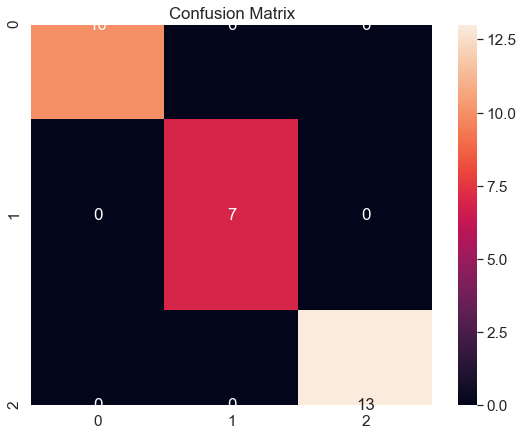

In [28]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.set(font_scale=1.4)
plt.figure(figsize=(9,7))
plt.tight_layout()
plt.title('Confusion Matrix') #그래프의 타이틀
sns.heatmap(df_cm, annot=True) #혼동행렬 그래프